In [1]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dermatology = fetch_ucirepo(id=33) 
  
# data (as pandas dataframes) 
X = dermatology.data.features 
y = dermatology.data.targets 
 # metadata 
print(dermatology.metadata) 
  
# variable information 
print(dermatology.variables) 


{'uci_id': 33, 'name': 'Dermatology', 'repository_url': 'https://archive.ics.uci.edu/dataset/33/dermatology', 'data_url': 'https://archive.ics.uci.edu/static/public/33/data.csv', 'abstract': 'Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 366, 'num_features': 34, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5FK5P', 'creators': ['Nilsel Ilter', 'H. Guvenir'], 'intro_paper': {'ID': 387, 'type': 'NATIVE', 'title': 'Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals', 'authors': 'H. Altay Güvenir, G. Demiröz, N. Ilter', 'venue': 'Artif. Intell. Medicine', 'year': 1998, 'journal': No

In [2]:
# Exibir as primeiras linhas do DataFrame
print(y)


     class
0        2
1        1
2        3
3        1
4        3
..     ...
361      4
362      4
363      3
364      3
365      1

[366 rows x 1 columns]


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
#separação da base em treianmento e teste  sendo 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#avaliação do modelo 
#treinamento e predição 
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia:  0.9864864864864865

Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.99        74
weighted avg       0.99      0.99      0.99        74



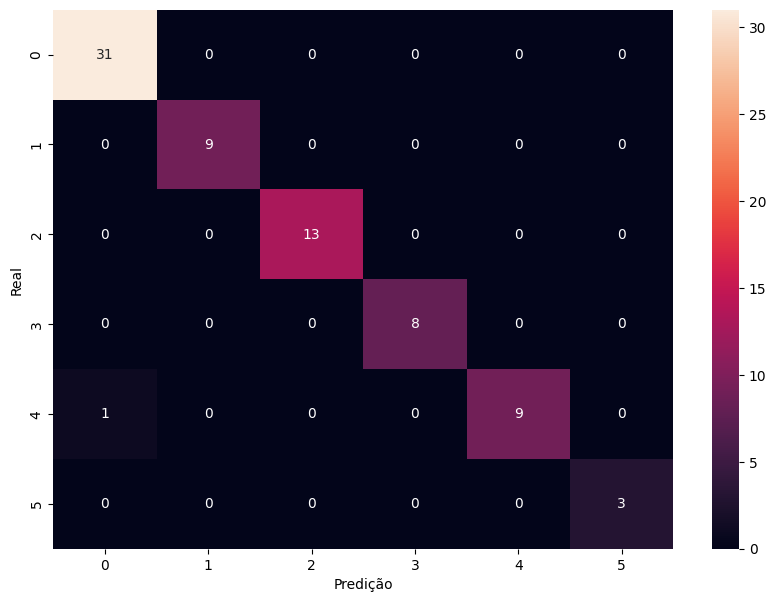

In [17]:
#matrix de confusão de cada classe com plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, pair_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#plot matrixz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()


In [18]:
# bagging
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

print("Acurácia: ", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia:  1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



C:\Users\baixi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#com o boosting
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model with imputed data
boosting_clf = HistGradientBoostingClassifier()
boosting_clf.fit(X_train_imputed, y_train)

# Make predictions with the test set
y_pred = boosting_clf.predict(X_test_imputed)

# Evaluate the model
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

C:\Users\baixi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia:  1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [29]:
#random forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rf_clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = rf_clf.predict(X_test)

# Avaliar o modelo
print("Acurácia: ", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia:  0.9864864864864865

Relatório de Classificação:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



C:\Users\baixi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


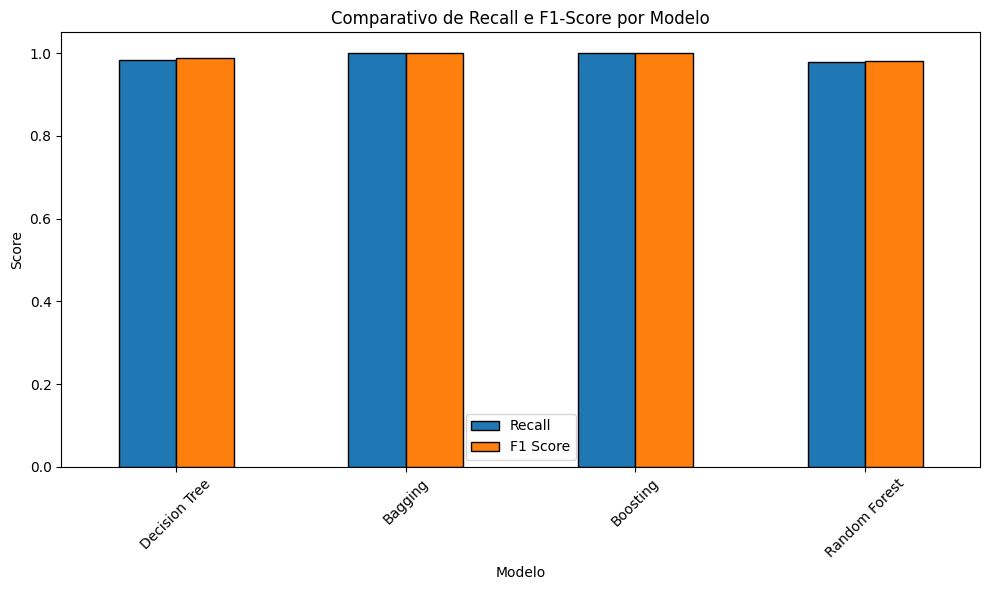

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

# Supondo que você já tenha as previsões e os relatórios de classificação para cada modelo
# Exemplo de relatórios de classificação
y_pred_decision_tree = clf.predict(X_test)  # Add this line to define y_pred_decision_tree
y_pred_bagging = bagging_clf.predict(X_test)  # Define y_pred_bagging
y_pred_boosting = boosting_clf.predict(X_test_imputed)  # Define y_pred_boosting
y_pred_random_forest = rf_clf.predict(X_test)  # Define y_pred_random_forest

reports = {
    'Decision Tree': classification_report(y_test, y_pred_decision_tree, output_dict=True),
    'Bagging': classification_report(y_test, y_pred_bagging, output_dict=True),
    'Boosting': classification_report(y_test, y_pred_boosting, output_dict=True),
    'Random Forest': classification_report(y_test, y_pred_random_forest, output_dict=True)
}

# Preparar os dados para o gráfico
models = ['Decision Tree', 'Bagging', 'Boosting', 'Random Forest']
recalls = []
f1_scores = []

for model in models:
    report = reports[model]
    # Extrair as métricas médias para cada modelo
    recall_avg = report['macro avg']['recall']
    f1_score_avg = report['macro avg']['f1-score']
    recalls.append(recall_avg)
    f1_scores.append(f1_score_avg)

# Criar um DataFrame para facilitar a plotagem
df = pd.DataFrame({
    'Model': models,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Plotar o comparativo
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='bar', x='Model', y=['Recall', 'F1 Score'], ax=ax, color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title('Comparativo de Recall e F1-Score por Modelo')
plt.ylabel('Score')
plt.xlabel('Modelo')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()